2022 Oct 20th, continue for model saving and acc list saving excel.
Figure statics are saved to dir of model param

2022 Sep 27th, trimed and refined. For wideband DNNs by default.

2022 Sep 12th, Adding DIY data normalization. Considering CNN with less FC layers, adding Dropout for DNNs

2022 July 15th, Transformer can't use Weight_decay!

2022 July 14th, editted for Prelim model structure selection.

2022 July 1st, editted for Prelim Results plotting.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install einops #maynot be needed every time restarting runtime


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 469 kB/s 


In [ ]:
!pip install thop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import heapq
import os
import math
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import sys
from copy import deepcopy
import random
import collections
from scipy import signal
from torchsummary import summary 
from drive.MyDrive.Wireless_Transformer.PSDshow import imshow
from drive.MyDrive.Wireless_Transformer.wrt import WrT # customized design of Wireless Transformer
from drive.MyDrive.Wireless_Transformer.AlexNet1D import AlexNet1D #import DIY DNN models
from drive.MyDrive.Wireless_Transformer.AlexNet1D import AlexNet1DConv
from drive.MyDrive.Wireless_Transformer.AlexNet1D import TutorialCNN
from drive.MyDrive.Wireless_Transformer.AlexNet1D import TutorialCNN2
from drive.MyDrive.Wireless_Transformer.AlexNet1D import TutorialCNN3
from drive.MyDrive.Wireless_Transformer.AlexNet1D import TutorialCNN4
from drive.MyDrive.Wireless_Transformer.AlexNet1D import TutorialCNN5
from drive.MyDrive.Wireless_Transformer.AlexNet1D import SmallMLP
from drive.MyDrive.Wireless_Transformer.AlexNet1D import BiggerMLP1
from drive.MyDrive.Wireless_Transformer.AlexNet1D import DeepSense
from drive.MyDrive.Wireless_Transformer.AlexNet1D import DeepSenseHalf
from drive.MyDrive.Wireless_Transformer.AlexNet1D import DeepSenseQuarter
from drive.MyDrive.Wireless_Transformer.AlexNet1D import DeepSenseEighth
from drive.MyDrive.Wireless_Transformer.AlexNet1D import DeepSenseSmall

from torch.utils.data import Dataset, DataLoader
from pytz import timezone
TMZ = timezone('EST')
device = torch.device("cuda")
import datetime
import shutil
from thop import profile
# torch.manual_seed(0)

Dataset description: cleanPSD64.pth, SNR-4dB, 10bands, 6PUs, 64pts/band.
2.148280143737793 1.7389541864395142
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 2, 640]              12
            Conv1d-2               [-1, 2, 640]              22
            Conv1d-3               [-1, 4, 320]              44
            Conv1d-4               [-1, 4, 320]              84
            Linear-5                   [-1, 10]           6,410
Total params: 6,572
Trainable params: 6,572
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.03
Estimated Total Size (MB): 0.07
----------------------------------------------------------------
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv1d'>.
[INFO] Register count_linear() for <class 'torch.nn.m

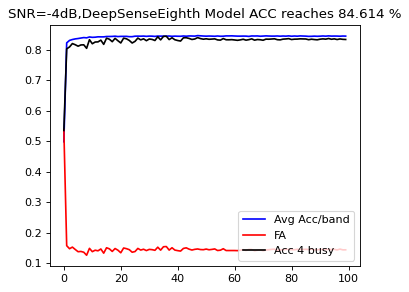

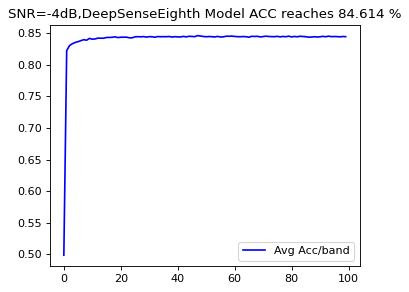

statics saved to excel: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/DeepSenseEighth/bondRedo/221128_17_38/convergSNR-4.xlsx
Time spent for running100epochs 0:10:38.404083
Testing accuracy: 69.24336242675781 %; detection rate: 99.94844055175781; false alarm: 61.46171569824219
Testing accuracy: 69.34453582763672 %; detection rate: 99.93281555175781; false alarm: 61.24374771118164
Testing accuracy: 69.51641082763672 %; detection rate: 99.92422485351562; false alarm: 60.89140319824219
Testing accuracy: 69.71484375 %; detection rate: 99.92031860351562; false alarm: 60.490623474121094
Testing accuracy: 69.90312957763672 %; detection rate: 99.91641235351562; false alarm: 60.11015319824219
Testing accuracy: 70.10586547851562 %; detection rate: 99.91719055175781; false alarm: 59.705467224121094
Testing accuracy: 70.224609375 %; detection rate: 99.89688110351562; false alarm: 59.447654724121094
Testing accuracy: 70.44570922851562 %; detection rate: 99.87500762939453; false alarm: 58

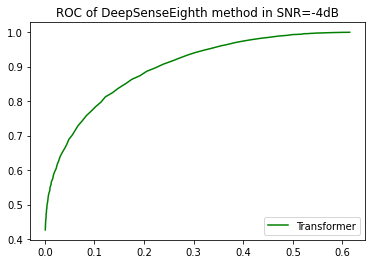

ROC in Excel saved to: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/DeepSenseEighth/bondRedo/221128_17_38/ROC_SNR-4.xlsx
ROC in Lists saved to: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/DeepSenseEighth/bondRedo/221128_17_38/DeepSenseEighthROC.pth
Dataset description: cleanPSD64.pth, SNR-2dB, 10bands, 6PUs, 64pts/band.
1.459863305091858 1.3081568479537964
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 2, 640]              12
            Conv1d-2               [-1, 2, 640]              22
            Conv1d-3               [-1, 4, 320]              44
            Conv1d-4               [-1, 4, 320]              84
            Linear-5                   [-1, 10]           6,410
Total params: 6,572
Trainable params: 6,572
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/back

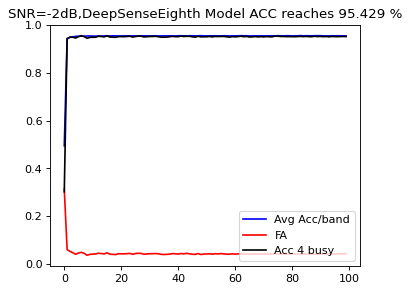

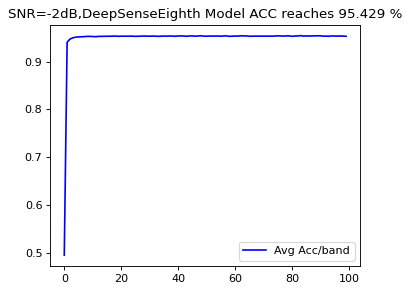

statics saved to excel: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/DeepSenseEighth/bondRedo/221128_17_52/convergSNR-2.xlsx
Time spent for running100epochs 0:11:21.102968
Testing accuracy: 84.56172180175781 %; detection rate: 99.85781860351562; false alarm: 30.734375
Testing accuracy: 84.88282012939453 %; detection rate: 99.85781860351562; false alarm: 30.092185974121094
Testing accuracy: 85.1773452758789 %; detection rate: 99.8492202758789; false alarm: 29.494529724121094
Testing accuracy: 85.49336242675781 %; detection rate: 99.7984390258789; false alarm: 28.81171417236328
Testing accuracy: 85.77188110351562 %; detection rate: 99.81250762939453; false alarm: 28.26874542236328
Testing accuracy: 86.18203735351562 %; detection rate: 99.8062515258789; false alarm: 27.442184448242188
Testing accuracy: 86.41407012939453 %; detection rate: 99.75469207763672; false alarm: 26.926559448242188
Testing accuracy: 86.72500610351562 %; detection rate: 99.7593765258789; false alarm: 26.

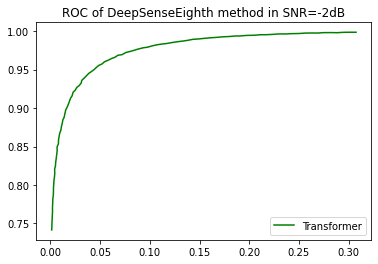

ROC in Excel saved to: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/DeepSenseEighth/bondRedo/221128_17_52/ROC_SNR-2.xlsx
ROC in Lists saved to: /content/drive/MyDrive/Wireless_Transformer/Saved_Models/DeepSenseEighth/bondRedo/221128_17_52/DeepSenseEighthROC.pth


In [ ]:
'''Sep12 version, DIY normalization'''
class ToyDatasetMaker(Dataset):
    "Toy version that wrap data/label tensor list into pytorch dataset"
    def __init__(self, data_list, label_list, transformFunc=transforms.Compose([ ]), norm_config=(1,1) ):
        """
        db: a list of input signal tensors, 
        label_list: a list of data labels, align with elements in db.
        """
        self.datasets = data_list
        self.label_list = label_list
        self.transformFunc = transformFunc
        self.norm_config = norm_config
    def __getitem__(self, i):
        img = self.datasets[i]
        img = self.transformFunc(img)
        img = (img-self.norm_config[0])/self.norm_config[1] # added for normalizing non-image
        class_label = self.label_list[i]
        return img, class_label

    def __len__(self):
        return len(self.label_list)
def adjust_learning_rate(optimizer, epoch):
    """Sets the learning rate to the initial LR decayed by 10 every 30 epochs"""
    epoch_inter = 30
#     print("Decrease learning rate every %d epoch by %2f" %(epoch_inter, des))
    #lr = 0.01 * (des ** (epoch // epoch_inter))
    bs = 0.2 #0.2
    lr = 0.0005 * bs ** (epoch/epoch_inter) #extra small for unbond DeepSenseEighth
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

def train(model, trainloader, epoch):
# tune weight_decay for different DNNs
  if isinstance(model, WrT): 
    weight_decay=0.000  #weight_decay=0.0005 for Alex
  if isinstance(model, TutorialCNN): 
    weight_decay=0.0005 #
  if isinstance(model, TutorialCNN2): 
    weight_decay=0.0005 #
  if isinstance(model, AlexNet1D): 
    weight_decay=0.0015 #
  if isinstance(model, AlexNet1DConv): 
    weight_decay=0.000 # .0001 has overfit
  if isinstance(model, DeepSenseEighth):
    weight_decay=0.00000
  else: #for other CNN or MLP
    weight_decay=0.00 #
  # optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=weight_decay)
  optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=weight_decay )


  adjust_learning_rate(optimizer, epoch)
  running_loss = 0.0
  model.train()
  for i, data in enumerate(trainloader, 0):
      inputs, labels = data
      inputs = Variable(inputs.view(-1,1,1,datas_tr[0].size(0)).to(device)) #640
      labels = Variable(labels.to(device))
      optimizer.zero_grad()# zero the parameter gradients
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
  print('Learning rate:', optimizer.param_groups[0]['lr'])
  return model, running_loss

def test(model, testloader, thresh = 0):
  total = 0 #sum of occupation and emptiness
  total_ocp = 0 #occupied bands
  total_emp = 0 #empty bands
  correct = 0
  correct_ocp = 0
  correct_emp = 0
  model.eval()
  with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs = Variable(inputs.view(-1,1,1,datas_tr[0].size(0) ).to(device)) #10bands=>640, 8bands=>512
        labels = Variable(labels.to(device)) 
        total_batch = float( torch.tensor(labels.size()).prod() ) 
        total += total_batch
        total_ocp += float(labels.sum())  #occupied bands
        total_emp += float(total_batch - labels.sum())  #empty bands
        outputs = ( model(inputs)> thresh ).bool()
        labels = labels.bool()
        correct_ocp += (outputs * labels).sum() 
        correct_emp += (~outputs * ~labels).sum()
        correct = correct_ocp + correct_emp
        if (outputs * labels).sum()+(~outputs * ~labels).sum() != (~(outputs^labels)) .sum():
          print('wrong!', (outputs * labels).sum()+(~outputs * ~labels).sum(),'!=', (~(outputs^labels)).sum())

  print(f'Testing accuracy: {100 * correct/total} %; detection rate: {100*correct_ocp/total_ocp}; false alarm: {100-100*correct_emp/total_emp}')
  return (correct/total, correct_ocp/total_ocp, correct_emp/total_emp) 

def setDir(filepath):
  # if directory not exist, create. if directory already exist, empty it.
  if not os.path.exists(filepath):
    os.makedirs(filepath)
  else:
    print('Directory already exists')
    shutil.rmtree(filepath, ignore_errors = True)
    os.mkdir(filepath)


for SNR in [-4, -2]:   #[ -2,-4,-6,-8,-10]:
# for volum in [400, 200]: #[400,200,100]:
  # SNR = -6
  volum = 4000 #4000 #samples per ocp pattern
  address1 =  '/content/drive/MyDrive/Wireless_Transformer/LeftRightIndep/' #LeftRightIndep version
  #use data under /RefinedNewData/ for submission
  # name1 = 'T_8b3P1sig_SNR'+str(SNR)+'.pth' #data of PU with the same sig
  name1 = 'T_10b5P5sig_SNR'+str(SNR)+'vol'+str(volum)+'.pth' #10bands, 5PUs, 5 kinds of sig, training & testing together
  # data_dict = torch.load(address1 + name1) # uncomment when volum is real
  #==================================Data_path_override======================================
  # data_dict = torch.load( '/content/drive/MyDrive/Wireless_Transformer/RefinedNewData/221024_13_53/221024_13_53Data_SNR-5vol4000.pth')
  # datadir = '/content/drive/MyDrive/Wireless_Transformer/RefinedNewData/221027_21_14/221027_21_14Data_SNR-5vol4000.pth'
  # datadir = '/content/drive/MyDrive/Wireless_Transformer/RefinedNewData/221030_17_33/221030_17_33Data_SNR-5vol4000.pth'
  datadir = '/content/drive/MyDrive/Wireless_Transformer/RefinedNewData/221030_21_21/221030_21_21Data_SNR'+str(SNR)+'vol4000.pth'
  # datadir = '/content/drive/MyDrive/Wireless_Transformer/RefinedNewData/unbonded/221116_19_42/221116_19_42Data_SNR'+str(SNR)+'vol'+str(volum)+'.pth'

  data_dict = torch.load( datadir )# use complete training data

  print('Dataset description:', data_dict['Description'] )
  datas_te = data_dict['testing data list']
  labels_te = data_dict['testing label list']
  datas_tr = data_dict['training data list']
  labels_tr = data_dict['training label list']

  num_bands = labels_te[0]
  #Calculate dataset mean and std 
  datas_all = datas_tr+datas_te
  data_tens =torch.cat(datas_all,dim=0) #data tensor for calculating mean&std, similar result if using training_data alone
  (data_mean, data_std) = ( torch.mean(data_tens).item(), torch.std(data_tens).item() )
  print(data_mean, data_std)

  trainset= ToyDatasetMaker(datas_tr, labels_tr, norm_config=(data_mean, data_std) )
  testset= ToyDatasetMaker(datas_te, labels_te, norm_config=(data_mean, data_std) )
  train_loader = DataLoader(trainset, batch_size=500, shuffle=True, num_workers=16, pin_memory=True)
  test_loader = DataLoader(testset, batch_size=1000, shuffle=False, num_workers=16, pin_memory=True)

  # v = AlexNet1D(num_classes = labels_te[0].size(0)).to(device)  
  # v = AlexNet1DConv(num_classes = labels_te[0].size(0)).to(device) 
  # v = SmallMLP(num_classes = labels_te[0].size(0)).to(device)
  # v = DeepSense(num_classes = labels_te[0].size(0)).to(device) 
  # v = DeepSenseHalf(num_classes = labels_te[0].size(0)).to(device) 
  # v = DeepSenseQuarter(num_classes = labels_te[0].size(0)).to(device)
  v = DeepSenseEighth(num_classes = labels_te[0].size(0)).to(device)
  # v = DeepSenseSmall(num_classes = labels_te[0].size(0)).to(device)
  criterion = nn.BCEWithLogitsLoss()

  summary(v, (1,640)) #show model details
  macs, params = profile(v.to('cpu'), inputs =(torch.randn(1, 640), )) #model on CPU
  print('macs are :\n',macs)
  print('params are :\n',params)
  # break
  v= v.to(device)


  nepoch = 100 #200
  acc_list = []
  acc_ocp_list = []
  fa_list = []
  # plt.title("Global Model ACC of the proposed method")
  max_acc = 0.
  now=datetime.datetime.now(TMZ) #time watermark
  time_watermark = now.strftime('%y%m%d_%H_%M')
  print('model watermark',time_watermark)
  address_model = '/content/drive/MyDrive/Wireless_Transformer/Saved_Models/'+type(v).__name__+'/bondRedo/'+time_watermark+'/' #root dir for saved models
  #child dir nbamed by time_watermark
  setDir(address_model) # if dir not exist, create. if dir already exist, empty it.
  name1 = type(v).__name__ +'_SNR'+str(SNR)+'vol'+str(volum)+'.pth'
  print('Model saved to dir:\n', address_model+name1)
  txt=open(address_model+'Datasetdir.txt',"w").write(datadir)#save dataset dir (dataset version)
  for i in range(nepoch):
    print('Epoch', i+1,':')      
    acc_ = test(v, test_loader)
      
    if acc_[0].cpu().item() > max_acc:
      max_acc = acc_[0].cpu().item()
      torch.save(v.state_dict(), address_model+name1)

    acc_list.append( acc_[0].cpu().item())
    acc_ocp_list.append(acc_[1].cpu().item())
    fa_list.append((1-acc_[2]).cpu().item())

    v, training_loss = train(v, train_loader, epoch=i)# Test first and train then version
    print(f'Max accuracy: {100 * max_acc} %; training loss: , {training_loss}') #print('training loss: ', training_loss)

  # axis = list( range(nepoch) )
  plt.figure(1,figsize=(5, 4), dpi=80)
  l1, = plt.plot( acc_list, color='blue',label='Avg Acc/band')
  l2, = plt.plot( fa_list, color='red', label='FA')
  l3, = plt.plot( acc_ocp_list, color='black', label='Acc 4 busy')
  plt.legend(loc='lower right')
  plt.title('SNR='+str(SNR)+'dB,'+ type(v).__name__+ ' Model ACC reaches %.3f %%' %  (100*max(acc_list))  )
  plt.show()

  plt.figure(2,figsize=(5, 4), dpi=80)
  l1, = plt.plot( acc_list, color='blue',label='Avg Acc/band')
  # l2, = plt.plot( fa_list, color='red', label='FA')
  # l3, = plt.plot( acc_ocp_list, color='black', label='Acc 4 busy')
  plt.legend(loc='lower right')
  plt.title('SNR='+str(SNR)+'dB,'+ type(v).__name__+ ' Model ACC reaches %.3f %%' %  (100*max(acc_list))  )
  plt.show()

  df1 = pd.DataFrame()
  # df1['acc_old'] = xx
  df1['Accuracy'] = acc_list
  df1['FA'] = fa_list
  df1['PD'] = acc_ocp_list

  rootaddr = address_model 

  with pd.ExcelWriter(rootaddr + "converg"+"SNR"+str(SNR)+".xlsx", mode='w') as writer:  #mode was 'a'
    df1.to_excel(writer, sheet_name=type(v).__name__)
  print('statics saved to excel:', rootaddr + "converg"+"SNR"+str(SNR)+".xlsx")
  #uniform the y axis, label SNR on title
  finish_tim=datetime.datetime.now(TMZ)
  print('Time spent for running'+str(nepoch)+'epochs',finish_tim - now)

  '''ROC module of current AlexNet model, saved in pd2 and pfa2'''
  pd2= []
  pfa2 = []

  v.load_state_dict(torch.load(address_model+name1))

  for thresh_val in [ (i-50)/12.5 for i in range(100)]: 
    #[i*0.9999/100 for i in list(range(1,100))]
    # in [(1-i/50)*5e-8+1e-10 for i in list(range(50))]
      CNNoutput = test(v, test_loader, thresh=thresh_val) #
      #testnets( net_list, class_dir, tol_test_loader, thresh_sig = thresh_val )
      pd2.append(CNNoutput[1].to(torch.device('cpu')).item())
      pfa2.append(1-CNNoutput[2].to(torch.device('cpu')).item())

  plt.title("ROC of " +type(v).__name__+ " method in SNR="+str(SNR)+"dB")
  l2, = plt.plot(pfa2, pd2, color='green', label='Transformer')
  plt.legend(loc='lower right')
  plt.show()

  dfroc = pd.DataFrame() # save statics to excel
  # df1['acc_old'] = xx
  dfroc['PD'] = pd2
  dfroc['PFA'] = pfa2
  with pd.ExcelWriter(address_model + "ROC_SNR"+str(SNR)+".xlsx", mode='w') as writer:  #mode was 'a'
    dfroc.to_excel(writer, sheet_name=type(v).__name__)
  print('ROC in Excel saved to:', address_model + "ROC_SNR"+str(SNR)+".xlsx")

  ROC_dict = {
      'pd':pd2,
      'pfa':pfa2,
  }
  torch.save(ROC_dict, address_model+type(v).__name__+'ROC.pth')
  print('ROC in Lists saved to:', address_model+type(v).__name__+'ROC.pth')

In [ ]:
v = DeepSense(num_classes = labels_te[0].size(0)).to(device) 
summary(v, (1,640)) #show model details
macs, params = profile(v.to('cpu'), inputs =(torch.randn(1, 640), )) #model on CPU
print('macs are :\n',macs)
print('params are :\n',params)

In [ ]:
# plt.title("ROC of " +type(v).__name__+ " method in SNR="+str(SNR)+"dB")
# l2, = plt.plot(pfa2, pd2, color='green', label='Transformer')
# plt.legend(loc='lower right')
# plt.show()

In [ ]:
from google.colab import runtime
runtime.unassign()

In [ ]:
# # same as last cell
# dfroc = pd.DataFrame() # save statics to excel
# # df1['acc_old'] = xx
# dfroc['PD'] = pd2
# dfroc['PFA'] = pfa2

# with pd.ExcelWriter(address_model + "ROC_SNR"+str(SNR)+".xlsx", mode='w') as writer:  #mode was 'a'
#   dfroc.to_excel(writer, sheet_name=type(v).__name__)
# print('Statics saved to excel:', address_model + "ROC_SNR"+str(SNR)+".xlsx")

In [ ]:
# load results from other tests, e.g. WrTROC.pth. 
# ROC_dict=torch.load('/content/drive/MyDrive/Wireless_Transformer/Saved_Models/WrTOct26/221027_23_41/WrTOct26ROC.pth')  #load another result for reference
# plt.title("ROC of several methods at SNR="+str(SNR)+'dB')
# # l1, = plt.plot(pfa, pd, color='blue',label='EnergyDetection1')
# l2, = plt.plot(ROC_dict['pfa'], ROC_dict['pd'], color='red', label='Transformer')
# l3, = plt.plot(pfa2, pd2, color='green', label='DNN')
# plt.legend(loc='lower right')
# plt.show()
